# Versuch 222: Heißluftmotor

In [1]:
%matplotlib inline
from helper import *
import numpy as np
import matplotlib.pyplot as plt

## Teil 1: Kältemaschiene

In [2]:
np.sqrt(2)*.1

0.14142135623730953

In [3]:
245.5/60,1.5/60,283/60,1/60

(4.091666666666667, 0.025, 4.716666666666667, 0.016666666666666666)

In [4]:
cw = 4187
rho = .001
f = 283
t = 2.9
dv = 245.5
im = 5*1.08
um = 5.18
dim = 5*.01
dum =.01

In [5]:
pk = um*im
dpk = np.sqrt((dum*um)**2+(dim*im)**2)
printResult("P_k",pk,dpk,"J/s")

P_k: ( 27.972 +/- 0.27492406224264915 ) J/s


In [6]:
q1 = cw * rho * t * dv / f
dq1 = f*np.sqrt((.1/t)**2+(1.5/dv)**2+(1/f)**2)
printResult("Q_1",q1,dq1,"J")

Q_1: ( 10.533337985865725 +/- 9.960951178926736 ) J


In [7]:
pm = 99.18
wm = pm/f*60
dwm = wm*np.sqrt((.5/pm)**2+(1/f)**2)
printResult("W_m",wm,dwm,"J")

W_m: ( 21.02756183745583 +/- 0.12945399110015798 ) J


In [8]:
q2 = um*im/f*60
dq2 = np.sqrt((dum*um)**2+(dim*im)**2+(1/f)**2)*q2
printResult("Q_2",q2,dq2,"J")

Q_2: ( 5.930459363957598 +/- 1.6305606443181404 ) J


In [9]:
eta = q2/wm
deta = np.sqrt((dq2/q2)**2+(dwm/wm)**2)*eta
printResult("eta",eta,deta,"")

eta: 0.28203266787658804 +/- 0.0775634075131014


## Teil 2: Kältemaschiene und Wärmepumpe

In [10]:
mw = 1 
dmw = .1
lamb = 335 
t = 140
dt = 10

pk = mw*lamb/t
dpk = np.sqrt((dmw/mw)**2+(dt/t)**2)*pk
printResult("P_k",pk,dpk,"J/s")

P_k: ( 2.392857142857143 +/- 0.29405907800604897 ) J/s


## Teil 3: Wärmekraftmaschiene

In [11]:
flist = np.array([364,364.5,362])
df = 1
ih = 2.62*5
dih = .05/2.62*ih
printResult("I_H",ih,dih,"A")
uh = 12.05
duh = .05

f = (np.sum(flist))/3
printResult("f",f,df,"rpm")
df = df/f
f = f/60
printResult("f",f,df*f,"rps")
df = df*f

I_H: ( 13.100000000000001 +/- 0.25000000000000006 ) A
f: ( 363.5 +/- 1 ) rpm
f: ( 6.058333333333334 +/- 0.016666666666666666 ) rps


In [12]:
pel = uh*ih
dpel = np.sqrt((duh/uh)**2+(dih/ih)**2)*pel
printResult("P_el",pel,dpel,"J/s")

P_el: ( 157.85500000000002 +/- 3.082885215183985 ) J/s


In [13]:
qel = pel/f
dqel = qel*np.sqrt((dpel/pel)**2+(df/f)**2)
printResult("Q_el",qel,dqel,"J")

Q_el: ( 26.055845942228338 +/- 0.5138906450727512 ) J


In [14]:
cw = 4180
tin = 18.6
dt = .1
tout = 24.6
ddtrel = np.sqrt((dt/tin)**2+(dt/tout)**2)
printResult("DT",tout-tin,ddtrel*(tout-tin),"°C")

dv = 243/60 #ml/s
ddv = 1.5/60
printResult("dV",dv,ddv,"ml/s")

pout = cw*rho*(tout-tin)*dv
dpout = pout * np.sqrt((ddv/dv)**2+(ddtrel)**2)
printResult("P_out",pout,dpout,"J/s")

DT: ( 6.0 +/- 0.04044090409408779 ) °C
dV: ( 4.05 +/- 0.025 ) ml/s
P_out: ( 101.57399999999998 +/- 0.928352902153534 ) J/s


In [15]:
qout = pout/f
dqout = qout*np.sqrt((dpout/pout)**2+(df/f)**2)
printResult("Q_out",qout,dqout,"J")

Q_out: ( 16.76599724896836 +/- 0.16002681423634502 ) J


In [16]:
alist = np.array([28240.2,23854.2,25285.4])

a = (np.sum(alist))/3
da = np.sqrt(np.sum((a-alist)**2)/6)
printResult("A",a,da,"hPa*cm^3")
a = a/10000
da = da/10000
printResult("A",a,da,"J")

A: ( 25793.266666666666 +/- 1291.3423782164734 ) hPa*cm^3
A: ( 2.5793266666666668 +/- 0.12913423782164735 ) J


In [17]:
ppv = a*f
dppv = ppv*np.sqrt((da/a)**2+(df/f)**2)
printResult("P_pv",ppv,dppv,"J/s")

P_pv: ( 15.626420722222223 +/- 0.7835184644379543 ) J/s


In [18]:
eta= a/qel
deta = np.sqrt((da/a)**2+(dqel/qel)**2)*eta
printResult("eta_th",eta,deta,"")
eta = eta*100
deta = deta *100
printResult("eta_th", eta,deta,"%")

eta_th: 0.09899224428888677 +/- 0.005326755337710196
eta_th: ( 9.899224428888678 +/- 0.5326755337710196 ) %


In [19]:
qv = qel-qout-a
dqv = np.sqrt(dqel**2+dqout**2+da**2)
printResult("Q_v",qv,dqv,"J")

Q_v: ( 6.71052202659331 +/- 0.553505038591068 ) J


## Teil 4: Prony-Zaum

In [20]:
pel = uh*ih
dpel = np.sqrt((duh/uh)**2+(dih/ih)**2)*pel
printResult("P_el",pel,dpel,"J/s")

P_el: ( 157.85500000000002 +/- 3.082885215183985 ) J/s


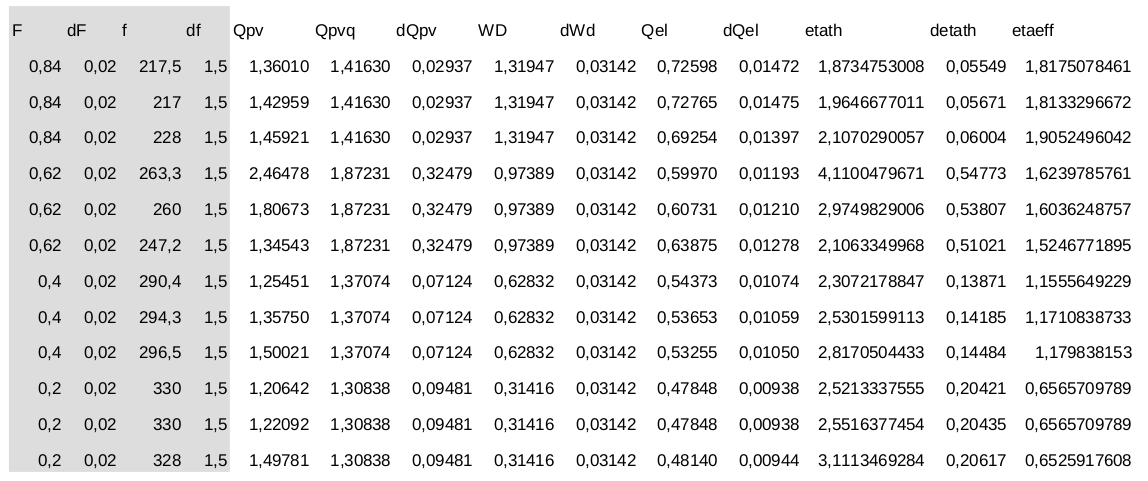

In [21]:
from IPython.display import Image
Image(filename=("222-4.png"))

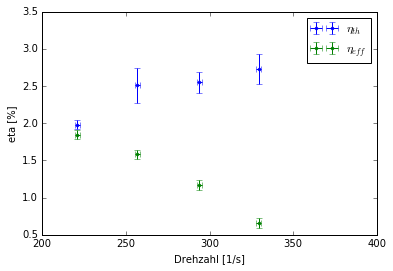

In [25]:
from pandas import DataFrame,read_csv
file = read_csv("222-4.csv",sep=" ",skiprows=0,decimal=",")
rot = [((file["f"][i*3])+(file["f"][i*3+1])+(file["f"][i*3+2]))/3 for i in range(4)]
drot = 1.5
etath = [file["ethathq"][i*3] for i in range(4)]
detath = [file["detathq"][i*3] for i in range(4)]
etaeff = [file["etaeffq"][i*3] for i in range(4)]
detaeff = [file["detaeffq"][i*3] for i in range(4)]

plt.errorbar(rot,etath,yerr=detath,xerr=drot,linestyle="none",marker=".",label='$\eta_{th}$')
plt.errorbar(rot,etaeff,yerr=detaeff,xerr=drot,linestyle="none",marker=".", label='$\eta_{eff}$')
plt.xlabel("Drehzahl [1/s]")
plt.ylabel("eta [%]")
plt.legend()
plt.xlim(200,400)
plt.ylim(.5,3.5)
plt.savefig('plot.pdf',format='pdf')
plt.show()